In [ ]:
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import open3d as o3d
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import os
from sklearn.neighbors import NearestNeighbors
from sklearn import cluster
from PIL import Image, ImageChops

depth_np = np.load('./depth_translation_glasses.npy')
colour_np = np.load('./colour_translated_glasses.npy')
# colour_np = np.load('colour_forward_glasses.npy')
# colour_np = np.load('colour_forward_mask.npy') # GOOD
# colour_np = np.load('colour_movement_blkglove.npy')  # GOOD use channel 2
# colour_np = np.load('colour_movement_blkglove_2.npy')  # GOOD use channel 2
# colour_np = np.load('colour_no_movement_glasses.npy')
# colour_np = np.load('colour_no_movement_glasses_orange.npy')
# colour_np = np.load('colour_no_movement_mask.npy')   # GOOD
# colour_np = np.load('colour_no_movement_mask_orange.npy')  # GOOD
# colour_np = np.load('colour_profile_mask.npy')
# colour_np = np.load('colour_scarf_glasses.npy')
# colour_np = np.load('colour_tilt_glasses.npy')
# colour_np = np.load('colour_tilt_glasses_orange.npy')
# colour_np = np.load('colour_tilt_mask.npy')    # GOOD
# colour_np = np.load('colour_tilt_mask_orange.npy')   # GOOD
# colour_np = np.load('colour_translation_glasses.npy')
# colour_np = np.load('colour_translation_glasses_orange.npy') # ok with channel 2
# colour_np = np.load('colour_translation_mask.npy')   # GOOD
# colour_np = np.load('colour_translation_mask_orange.npy')    # GOOD

# depth_np = np.load('depth_forward_mask.npy')
# depth_np = np.load('depth_movement_blkglove.npy')
# depth_np = np.load('depth_movement_blkglove_2.npy')
# depth_np = np.load('depth_no_movement_glasses.npy')
# depth_np = np.load('depth_no_movement_glasses_orange.npy')
# depth_np = np.load('depth_no_movement_mask.npy')
# depth_np = np.load('depth_no_movement_mask_orange.npy')
# depth_np = np.load('depth_profile_mask.npy')
# depth_np = np.load('depth_scarf_glasses.npy')
# depth_np = np.load('depth_tilt_glasses.npy')
# depth_np = np.load('depth_tilt_glasses_orange.npy')
# depth_np = np.load('depth_tilt_mask.npy')
# depth_np = np.load('depth_tilt_mask_orange.npy')
# depth_np = np.load('depth_translation_glasses.npy')
# depth_np = np.load('depth_translation_glasses_orange.npy')
# depth_np = np.load('depth_translation_mask.npy')
# depth_np = np.load('depth_translation_mask_orange.npy')



In [4]:


colour_img1 = colour_np[2]
colour_img2 = colour_np[15]
depth_img1 = depth_np[2]
depth_img2 = depth_np[15]
# # Forward glasses
# colour_img1 = colour_np[46]
# colour_img2 = colour_np[248]
# depth_img1 = depth_np[46]
# depth_img2 = depth_np[248]

# Forward mask
# colour_img1 = colour_np[24]
# colour_img2 = colour_np[156]
# depth_img1 = depth_np[24]
# depth_img2 = depth_np[156]

# # Movement blkglove
# colour_img1 = colour_np[31]
# colour_img2 = colour_np[130]
# depth_img1 = depth_np[31]
# depth_img2 = depth_np[130]

# # Movement blkglove_2
# colour_img1 = colour_np[24]
# colour_img2 = colour_np[174]
# depth_img1 = depth_np[24]
# depth_img2 = depth_np[174]

# # No movement glasses
# colour_img1 = colour_np[16]
# colour_img2 = colour_np[171]
# depth_img1 = depth_np[16]
# depth_img2 = depth_np[171]

# # No movement glasses orange
# colour_img1 = colour_np[31]
# colour_img2 = colour_np[193]
# depth_img1 = depth_np[31]
# depth_img2 = depth_np[193]

# # No movement mask
# colour_img1 = colour_np[9]
# colour_img2 = colour_np[191]
# depth_img1 = depth_np[9]
# depth_img2 = depth_np[191]

# # No movement mask orange
# colour_img1 = colour_np[4]
# colour_img2 = colour_np[149]
# depth_img1 = depth_np[4]
# depth_img2 = depth_np[149]

# # Profile mask
# colour_img1 = colour_np[39]
# colour_img2 = colour_np[134]
# depth_img1 = depth_np[39]
# depth_img2 = depth_np[134]

# # Scarf glasses
# colour_img1 = colour_np[230]
# colour_img2 = colour_np[19]
# depth_img1 = depth_np[230]
# depth_img2 = depth_np[19]

# # Tilt glasses
# colour_img1 = colour_np[3]
# colour_img2 = colour_np[167]
# depth_img1 = depth_np[3]
# depth_img2 = depth_np[167]

# # Tilt glasses orange
# colour_img1 = colour_np[4]
# colour_img2 = colour_np[184]
# depth_img1 = depth_np[4]
# depth_img2 = depth_np[184]

# # Tilt mask
# colour_img1 = colour_np[24]
# colour_img2 = colour_np[168]
# depth_img1 = depth_np[24]
# depth_img2 = depth_np[168]

# # Tilt mask orange
# colour_img1 = colour_np[20]
# colour_img2 = colour_np[167]
# depth_img1 = depth_np[20]
# depth_img2 = depth_np[167]

# # Translation glasses
# colour_img1 = colour_np[19]
# colour_img2 = colour_np[249]
# depth_img1 = depth_np[19]
# depth_img2 = depth_np[249]

# # Translation glasses orange
# colour_img1 = colour_np[4]
# colour_img2 = colour_np[184]
# depth_img1 = depth_np[4]
# depth_img2 = depth_np[184]

# # Translation mask
# colour_img1 = colour_np[6]
# colour_img2 = colour_np[297]
# depth_img1 = depth_np[6]
# depth_img2 = depth_np[297]

# # Translation mask orange
# colour_img1 = colour_np[22]
# colour_img2 = colour_np[263]
# depth_img1 = depth_np[22]
# depth_img2 = depth_np[263]



original_height, original_width, _ = colour_img1.shape

(240, 320)


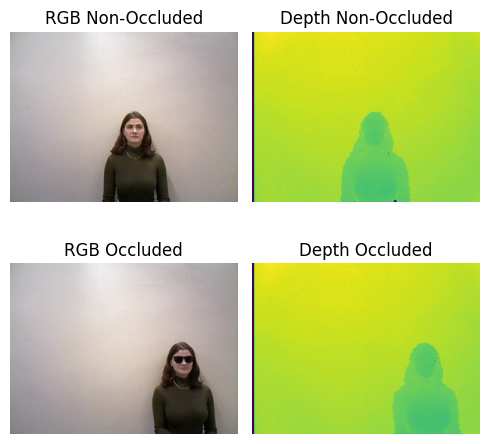

In [5]:
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.imshow(colour_img1)
plt.title("RGB Non-Occluded")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(depth_img1)
plt.title("Depth Non-Occluded")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(colour_img2)
plt.title("RGB Occluded")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(depth_img2)
plt.title("Depth Occluded")
plt.axis("off")

plt.tight_layout()
print(depth_img2.shape)

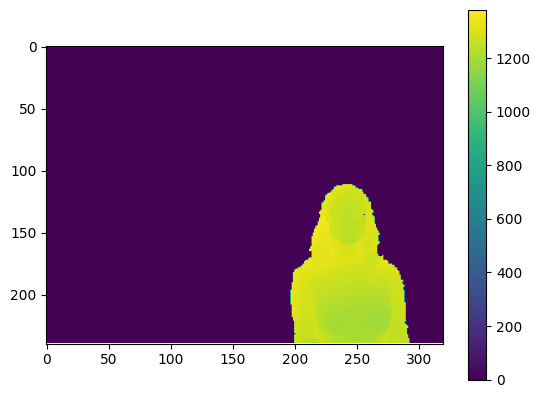

In [6]:
mask = (depth_img1 >= 1000) & (depth_img1 <= 1380)

# Set pixels outside this range to 0
depth_img1[~mask] = 0

mask = (depth_img2 >= 1000) & (depth_img2 <= 1380)

# Set pixels outside this range to 0
depth_img2[~mask] = 0

plt.imshow(depth_img2)
plt.colorbar()

In [30]:

def create_point_cloud_from_images(color_img, depth_img, intrinsics):
    """
    Create a point cloud from a color image and a depth image using the camera intrinsics.
    
    Args:
        color_img (np.ndarray): RGB image (H, W, 3).
        depth_img (np.ndarray): Depth image (H, W) in meters.
        intrinsics (dict): Camera intrinsics with keys: fx, fy, cx, cy.
        
    Returns:
        open3d.geometry.PointCloud: The generated point cloud.
    """
    h, w = depth_img.shape
    max_depth = 2.0
    # Generate pixel grid
    i, j = np.meshgrid(np.arange(w), np.arange(h))  # Pixel indices
    z = depth_img.flatten()  # Depth values
    x = -(j.flatten() - intrinsics['cx']) * z / intrinsics['fx']
    y = (i.flatten() - intrinsics['cy']) * z / intrinsics['fy']

    # Filter out invalid points (where depth is 0)
    valid = z > 0  & (z < max_depth)
    points = np.vstack((x[valid], y[valid], z[valid])).T

    # Map colors to points
    colors = color_img.reshape(-1, 3)[valid] / 255.0  # Normalize RGB to [0, 1]

    # Create Open3D PointCloud object

    num_points = min(100000, points.shape[0])  # Limit to 100,000 points
    indices = np.random.choice(points.shape[0], num_points, replace=False)
    sampled_points = points[indices]
    sampled_colors = colors[indices]

    point_cloud = o3d.geometry.PointCloud()
    point_cloud.points = o3d.utility.Vector3dVector(sampled_points)
    point_cloud.colors = o3d.utility.Vector3dVector(sampled_colors)

    return point_cloud



In [31]:
# Visualize the point clouds

# Function to handle the 'Q' key press for closing the window
def close_window(vis):
    print("Closing the window")
    vis.destroy_window()

def visualizePointCloud(pcd):
    vis = o3d.visualization.VisualizerWithKeyCallback()
    vis.create_window()

    # Add the point cloud to the visualizer
    vis.add_geometry(pcd)

    # Bind the 'Q' key to close the window
    vis.register_key_callback(ord('Q'), close_window)

    # Start the visualization
    vis.run()


In [32]:
# Intrinsic parameters of your camera
intrinsics = {
    'fx': 583.2829786373293,  # Focal length in x (example)
    'fy': 579.4112549695428,  # Focal length in y (example)
    'cx': 320.0 / 2,  # Principal point x (example)
    'cy': 240.0 / 2,  # Principal point y (example)
}

# Create point clouds
pcd1 = create_point_cloud_from_images(colour_img1, depth_img1, intrinsics)
pcd2 = create_point_cloud_from_images(colour_img2, depth_img2, intrinsics)

visualizePointCloud(pcd1)
visualizePointCloud(pcd2)
# Save point clouds as .ply files (or any other format like .pcd, .xyz)
o3d.io.write_point_cloud("point_cloud1.ply", pcd1)
# o3d.io.write_point_cloud("point_cloud2.ply", pcd2)

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
Closing the window
[Open3D WARNING] GLFW Error: The GLFW library is not initialized
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
Closing the window
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


True

In [53]:
# Perform ICP alignment
import copy

pcd1_copy = copy.deepcopy(pcd1)

threshold = 100  # Distance threshold
trans_init = np.eye(4)  # Initial transformation guess
reg_p2p = o3d.pipelines.registration.registration_icp(
    pcd1_copy, pcd2, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPoint()
)

# Get the transformation matrix
icp_transformation = reg_p2p.transformation
print("Transformation Matrix from ICP:\n", icp_transformation)

# Transform the source point cloud
pcd1_copy.transform(icp_transformation)


print("Fitness:", reg_p2p.fitness)
print("Inlier RMSE:", reg_p2p.inlier_rmse)
# Visualize the aligned point clouds
bbox1 = pcd1_copy.get_axis_aligned_bounding_box()
bbox1.color = (1, 0, 0)  # Red box
bbox2 = pcd2.get_axis_aligned_bounding_box()
bbox2.color = (0, 1, 0)  # Green box
# o3d.visualization.draw_geometries([pcd1_copy, bbox1, pcd2, bbox2], window_name="ICP with Bounding Boxes")

visualizePointCloud(pcd1_copy)

Transformation Matrix from ICP:
 [[ 9.99767092e-01  9.51573890e-03  1.93704231e-02 -2.35450395e+01]
 [-1.26854371e-02  9.85235016e-01  1.70736766e-01 -6.20476336e+01]
 [-1.74597327e-02 -1.70942722e-01  9.85126258e-01  3.01226125e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Fitness: 0.9993049119555144
Inlier RMSE: 5.297395532497159
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
Closing the window
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


(240, 320, 3)
(240, 320, 3)


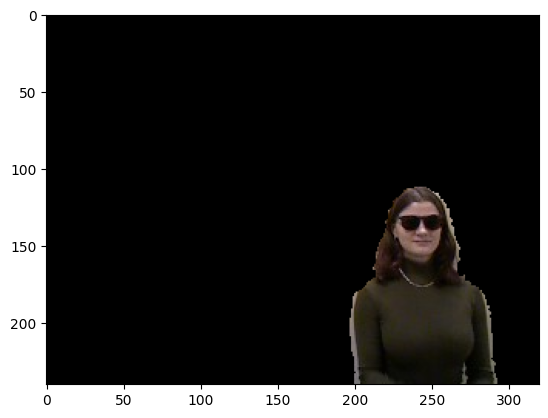

In [55]:
#Extrinsic matrix = icp_transformation
def create_depth_image_from_point_cloud(point_cloud, intrinsics, img_shape):
    """
    Create a depth image from a point cloud using camera intrinsics.
    
    Args:
        point_cloud (open3d.geometry.PointCloud): The input point cloud.
        intrinsics (dict): Camera intrinsics with keys: fx, fy, cx, cy.
        img_shape (tuple): Shape of the output depth image (H, W).
    
    Returns:
        np.ndarray: Reconstructed depth image.
    """
    h, w = img_shape
    depth_img = np.zeros((h, w), dtype=np.float32)  # Initialize depth image with zeros
    rgb_img = np.zeros((h, w, 3), dtype=np.uint8)   # Initialize RGB image with zeros

    # Extract points from the point cloud
    points = np.asarray(point_cloud.points)  # Shape: (N, 3)
    colors = np.asarray(point_cloud.colors)  # Shape: (N, 3), values in [0, 1]

    y, x, z = points[:, 0], points[:, 1], points[:, 2]

    # Project 3D points back to 2D image plane
    i = (x * intrinsics['fy'] / z) + intrinsics['cy']
    j = (-y * intrinsics['fx'] / z) + intrinsics['cx']

    # Round to nearest integer and filter points that fall within the image boundaries
    i = np.round(i).astype(int)
    j = np.round(j).astype(int)
    valid = (i >= 0) & (i < w) & (j >= 0) & (j < h) & (z > 0)
    # i, j, z = i[valid], j[valid], z[valid]
    i, j, z, colors = i[valid], j[valid], z[valid], colors[valid]

    # Populate the depth image
    depth_img[j, i] = z
    rgb_img[j, i] = (colors * 255).astype(np.uint8)  # Scale to 0–255

    print(rgb_img.shape)
    return depth_img, rgb_img

    
img_width, img_height = 320, 240
fx = 583.2829786373293 
fy = 579.4112549695428  
cx = 320.0 /2 
cy = 240.0/2 
img_shape = depth_img1.shape
intrinsic_array = np.array([
    [fx, 0, cx],  # Red
    [0, fy, cy],  # Green
    [0, 0, 0]   # Blue
])

icp_depth_translated, icp_rgb_translated = create_depth_image_from_point_cloud(pcd1_copy, intrinsics, img_shape)
icp_depth_original, icp_rgb_original = create_depth_image_from_point_cloud(pcd2, intrinsics, img_shape)


plt.imshow(icp_rgb_original)



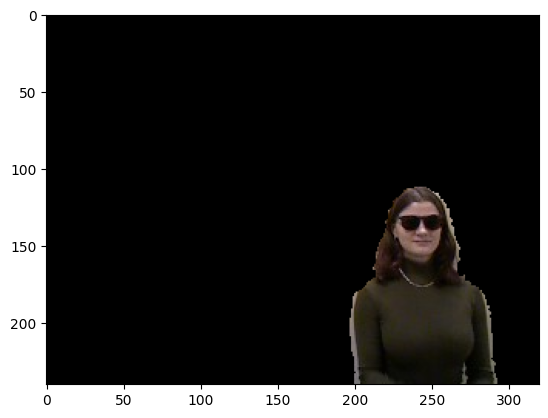

In [56]:
# DO FOR ORIGINAL IMAGE

min_depth = 1000
max_depth = 1400

# Mask the depth image
depth_mask = (icp_depth_original >= min_depth) & (icp_depth_original <= max_depth)
plt.imshow(depth_mask)

# Create a canvas with the same size as the depth image (black by default)
original_cropped = np.zeros_like(icp_rgb_original)

# Loop through the pixels of the color image and apply the depth mask
for y in range(icp_rgb_translated.shape[0]):
    for x in range(icp_rgb_translated.shape[1]):
        if depth_mask[y, x]:  # If depth is within the desired range
            original_cropped[y, x] = icp_rgb_original[y, x]  # Copy the color from the original image
        else:
            # image1_cropped[y, x] = (255, 255, 255)  # Set the pixel to black if outside the range
            original_cropped[y, x] = (0, 0, 0)  # Set the pixel to black if outside the range

plt.imshow(original_cropped)
#canvas[depth_mask] = colour_img1  # You can adjust this value for visualization (e.g., color or intensity)


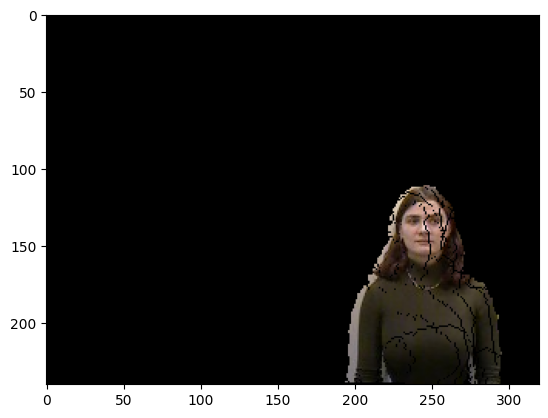

In [57]:
# DO FOR TRANSLATED IMAGE

min_depth = 1000
max_depth = 1400

# Mask the depth image
depth_mask = (icp_depth_translated >= min_depth) & (icp_depth_translated <= max_depth)
plt.imshow(depth_mask)

# Create a canvas with the same size as the depth image (black by default)
translated_cropped = np.zeros_like(icp_rgb_translated)

# Loop through the pixels of the color image and apply the depth mask
for y in range(icp_rgb_translated.shape[0]):
    for x in range(icp_rgb_translated.shape[1]):
        if depth_mask[y, x]:  # If depth is within the desired range
            translated_cropped[y, x] = icp_rgb_translated[y, x]  # Copy the color from the original image
        else:
            # image1_cropped[y, x] = (255, 255, 255)  # Set the pixel to black if outside the range
            translated_cropped[y, x] = (0, 0, 0)  # Set the pixel to black if outside the range

plt.imshow(translated_cropped)
#canvas[depth_mask] = colour_img1  # You can adjust this value for visualization (e.g., color or intensity)


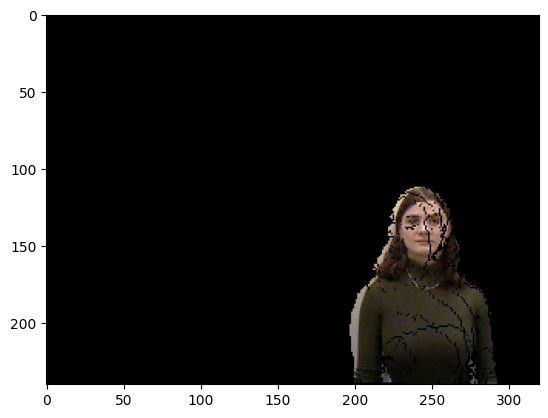

In [58]:
#Gte the pixels where neither is empty (more rigourous)
mask1 = np.all(translated_cropped != [255, 255, 255], axis=-1) 
mask2 = np.all(original_cropped != [0, 0, 0], axis=-1)  # Non-black pixels in translated_img_colour

mask = (np.all(translated_cropped != [0, 0, 0], axis=-1)  & np.all(original_cropped != [0, 0, 0], axis=-1) )
#mask = np.all(image2_cropped != [0, 0, 0], axis=-1)  # Non-black pixels in translated_img_colour

# Step 2: Create a copy of the canvas to overlay the image onto
h, w, channels = translated_cropped.shape
transformed_cropped = np.zeros((h, w, channels), dtype=np.uint8)

# Step 3: Use the mask to copy pixels from translated_img_colour to the canvas
transformed_cropped[mask] = icp_rgb_translated[mask]

# Step 4: Display the result
plt.imshow(transformed_cropped)
plt.show()

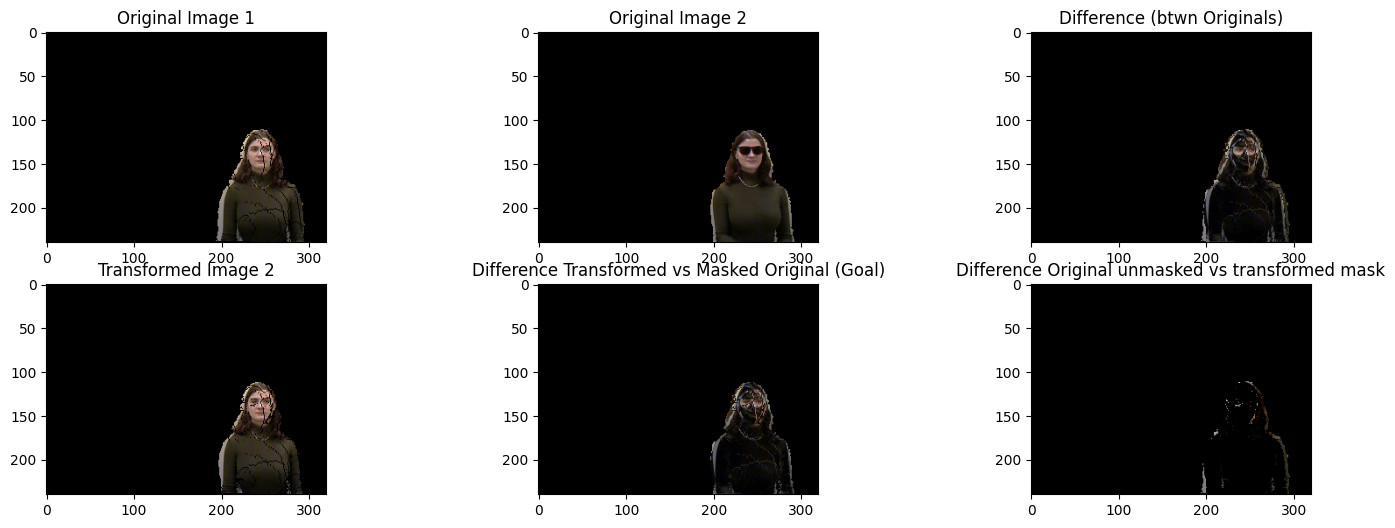

In [41]:

# convert to pillow
col_image1 = Image.fromarray(translated_cropped)
col_image2 = Image.fromarray(original_cropped)
col_image3 = Image.fromarray(transformed_cropped)


diff_original = ImageChops.difference(col_image1, col_image2) 
diff_trans = ImageChops.difference(col_image2, col_image3) 
diff_og_trans = ImageChops.difference(col_image1, col_image3) 

diff_diff = ImageChops.difference(diff_original, diff_og_trans) 

# diff.show()
# plt.show()

plt.figure(figsize=(18, 6))

# Plot original image2
plt.subplot(2, 3, 1)
plt.title("Original Image 1")
plt.imshow(col_image1)

# Plot transformed image2
plt.subplot(2, 3, 2)
plt.title("Original Image 2")
plt.imshow(col_image2)

# Plot difference image
plt.subplot(2, 3, 3)
plt.title("Difference (btwn Originals)")
plt.imshow(diff_original)

plt.subplot(2, 3, 4)
plt.title("Transformed Image 2")
plt.imshow(col_image3)

plt.subplot(2, 3, 5)
plt.title("Difference Transformed vs Masked Original (Goal)")
plt.imshow(diff_trans)

plt.subplot(2, 3, 6)
plt.title("Difference Original unmasked vs transformed mask")
plt.imshow(diff_og_trans)



(240, 320, 3)


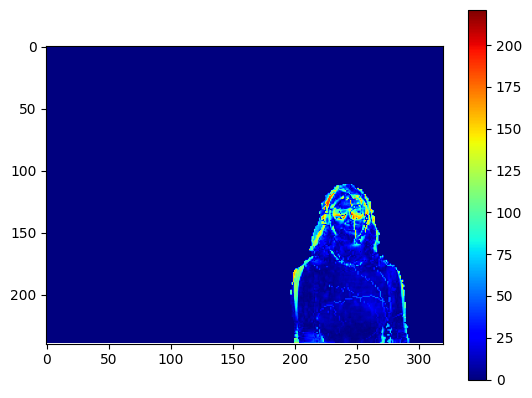

In [61]:

diff = np.array(diff_trans)

hsvImg2_diff = cv2.cvtColor(diff, cv2.COLOR_RGB2HSV)

print(hsvImg2_diff.shape)
plt.imshow(hsvImg2_diff[:,:,2], cmap='jet')
plt.colorbar()

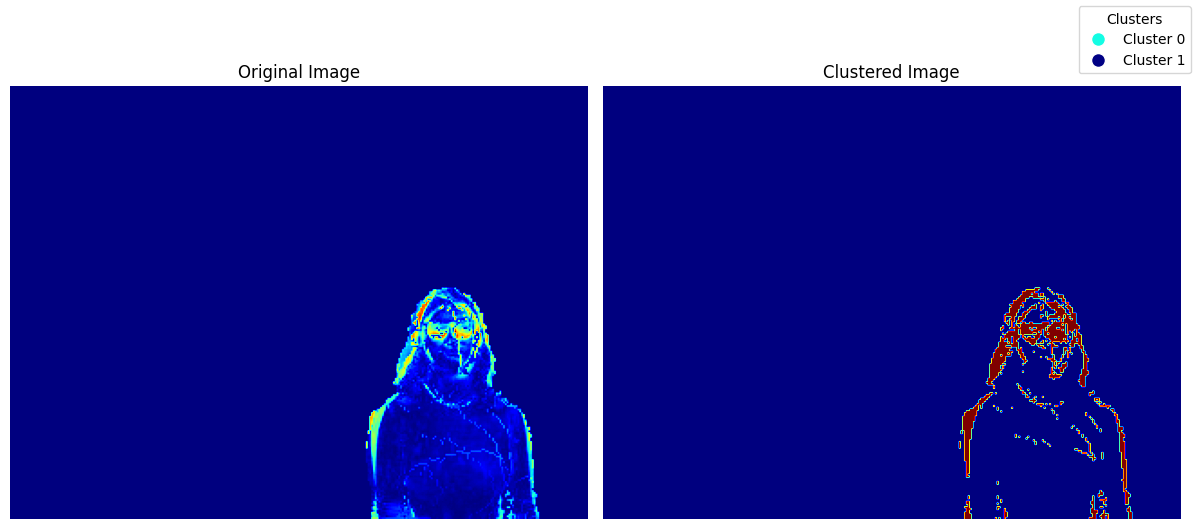

In [62]:

image = hsvImg2_diff[:,:,2]

# Reshape and convert image to float32 for k-means
Z = image.reshape((-1, 1))
Z = np.float32(Z)

# Define k-means criteria and apply k-means - iterations, then epilson
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.2)
K = 2
_, label, center = cv2.kmeans(Z, K, None, criteria, attempts=20, flags=cv2.KMEANS_RANDOM_CENTERS)

# Convert cluster centers to uint8
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image.shape))

# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the original and clustered images
ax[0].imshow(image, cmap='jet')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(res2, cmap='jet')
ax[1].set_title("Clustered Image")
ax[1].axis('off')

# Add a legend for the clusters
unique_clusters = np.arange(K)  # 0, 1, ..., K-1
colors = [plt.cm.jet(c / 255) for c in center.flatten()]  # Map grayscale to colors
legend_labels = [f"Cluster {i}" for i in unique_clusters]

# Create legend entries
legend_patches = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
    for color in colors
]
fig.legend(legend_patches, legend_labels, loc='upper right', title="Clusters")

plt.tight_layout()
plt.show()


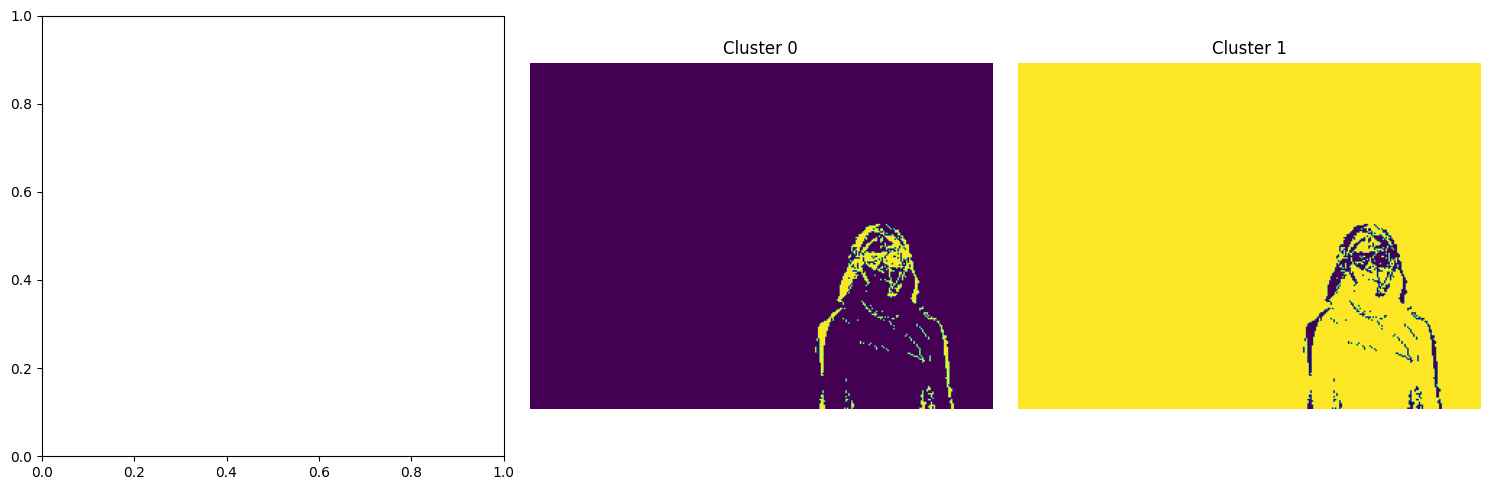

In [63]:
fig, axes = plt.subplots(1, K + 1, figsize=(15, 5))


for cluster_to_plot in range(K):
    mask = (label.flatten() == cluster_to_plot).astype(np.uint8)  # Mask for current cluster
    single_cluster = mask.reshape(image.shape) * center[cluster_to_plot]  # Isolated cluster
    
    axes[cluster_to_plot + 1].imshow(single_cluster)
    axes[cluster_to_plot + 1].set_title(f"Cluster {cluster_to_plot}")
    axes[cluster_to_plot + 1].axis('off')

plt.tight_layout()
plt.show()


IF THIS ISN'T WORKING TAKE THE CLUSTER WITH THE PURPLE BACKGROUND!!!!

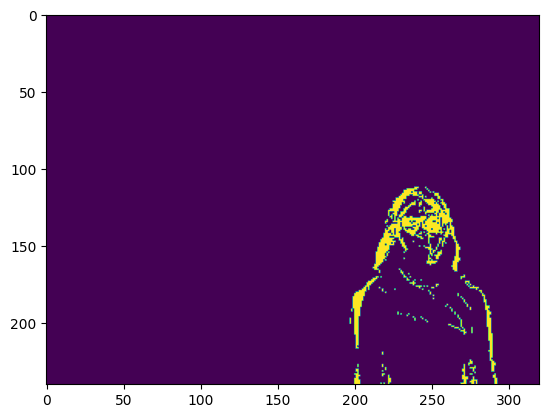

In [67]:
cluster_to_plot = 0 # Change this to the desired cluster index
mask = (label.flatten() == cluster_to_plot).astype(np.uint8)  # Create a mask for the cluster
single_cluster = mask.reshape(image.shape) * center[cluster_to_plot]  # Apply the mask

plt.imshow(single_cluster)

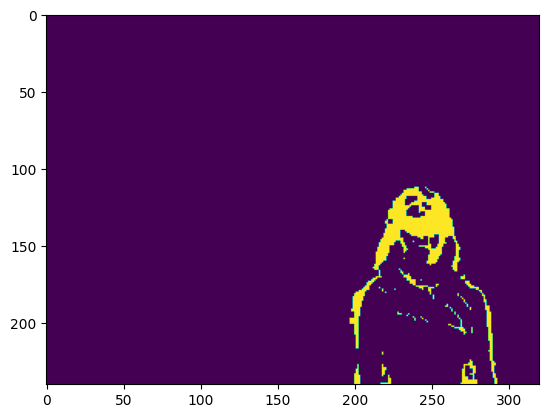

In [68]:

kernel = np.ones((3, 3), np.uint8)

closed_edges = cv2.morphologyEx(single_cluster, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed_edges)



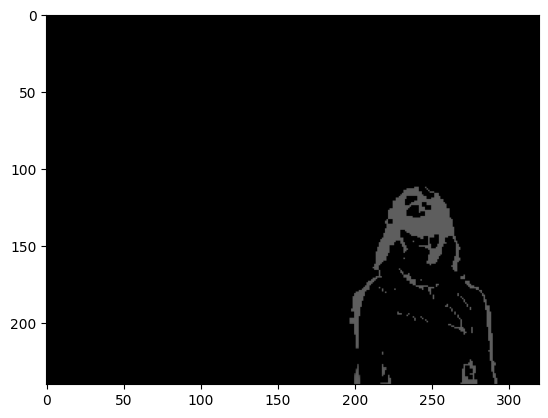

In [69]:
single_cluster_RGB = cv2.cvtColor(closed_edges, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR
closed_edges_ary = np.array(single_cluster_RGB)  # Ensure it's in a NumPy array format
dst = cv2.fastNlMeansDenoisingColored(closed_edges_ary, None, h=12, hColor=10, templateWindowSize=100, searchWindowSize=50)

# Display the denoised image
plt.imshow(dst)


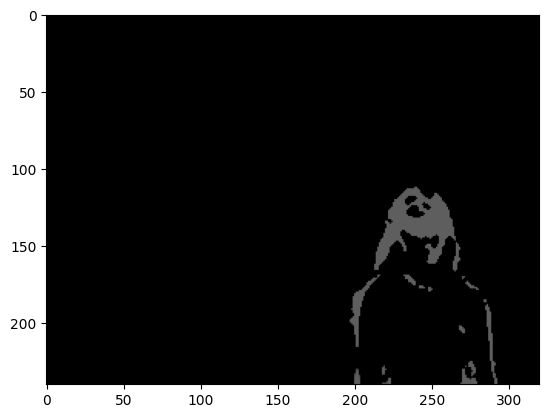

In [71]:
img_gray_blur = cv2.medianBlur(dst, 3) #THIS ONE


plt.imshow(img_gray_blur)

(-0.5, 319.5, 239.5, -0.5)

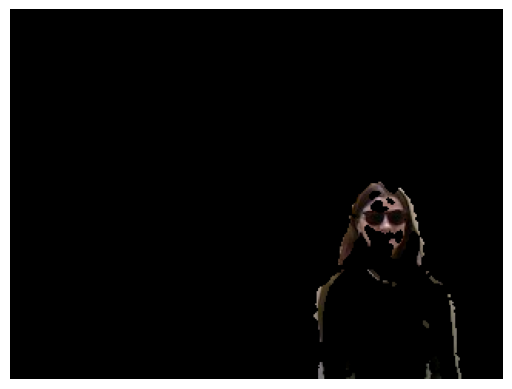

In [72]:
rbg_nonoccluded = np.array(col_image2) # col_image1 is the NON-OCCLUDED original image
rbg_nonoccluded[img_gray_blur == 0] = 0
plt.imshow(rbg_nonoccluded)
plt.axis('off')

(-0.5, 319.5, 239.5, -0.5)

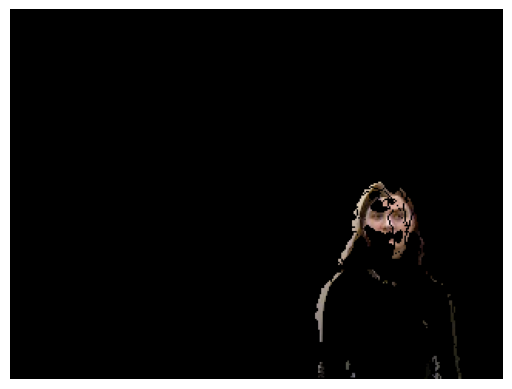

In [73]:
# get region where mask is from non-occluded image

rbg_nonoccluded = np.array(col_image1) # col_image1 is the NON-OCCLUDED original image
rbg_nonoccluded[img_gray_blur == 0] = 0
plt.imshow(rbg_nonoccluded)
plt.axis('off')




(-0.5, 319.5, 239.5, -0.5)

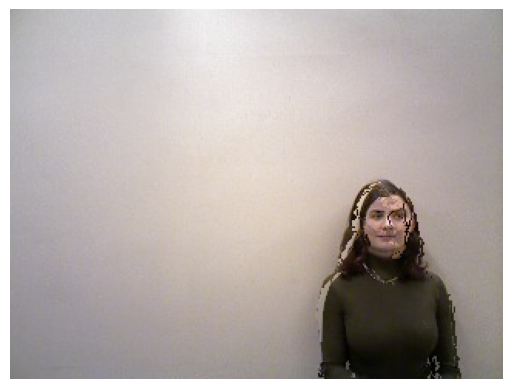

In [74]:
# place the above region on the occluded image

face_seg = rbg_nonoccluded 
mask = np.any(face_seg > 0, axis=-1)
# rbg_mask = np.array(col_image2) # col_image3 is the occluded image!!

rbg_mask = np.array(colour_img2) # col_image3 is the occluded image!!

rbg_mask[mask] = face_seg[mask] # 

plt.imshow(rbg_mask)
plt.axis('off')

# plt.imshow(col_image2)